<h1 align="center">
    <img alt="Animi Motus AI Logo" src="images\logo.png" width="400" height="400">
    <br />
    Den Loob - 01.01.1970
</h1>

<hr />

<div dir="rtl">
    <h2 align="center"><u>מטרת המחקר</u></h2>
    <div align="center">
    מטרת המחקר בשם Animi Motus* לעזור לאנשים עם הפרעות בזיהוי הבעות פנים. דוגמאות להפרעות כאלה הן 
    <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2737612/#b43">הפרעה דכאונית קשה</a>
    ו<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2737612/#b32">סכיזופרניה</a>.
    </div>
</div>

\* משמעות של *"Animi Motus"* הינה *"רגשות"* בלטינית

<hr />

<div dir="rtl">
    <h2 align="center"><u>תיאור הנתונים</u></h2>

מאגר הנתונים ששומש במחקר זה נמצא באתר
<a href="https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset">kaggle</a>
תחת הקישור המצורף לשם האתר. מאגר נתונים זה הוכן על ידי
<a href="https://jonathanoheix.github.io/">
Jonathan Oheix
</a>,
<a href="https://github.com/nakulsingh1289">
Nakul Singh
</a>
ו<a href="http://happyai.epizy.com/">Sagnik Roy</a>
וכולל סך הכל 28821 תמונות לאימון ו7066 תמונות לאימות.

</div>

<hr />
<h2 align="center"><u>חקר נתונים</u></h2>

In [1]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

all_emotion_types = os.listdir("dataset/train/")
epc = { # emotion_picture_count
    "type": [], # train or validation
    "emotion": [], # angry, sad, happy and etc
    "count": [], # int
    
}
# fill epc (emotion_picture_count) with `emotion_name: emotion_pictures_count`
for emotion_type in all_emotion_types:
    train_emotion_len = len(os.listdir("dataset/train/"+emotion_type))
    validation_emotion_len = len(os.listdir("dataset/validation/"+emotion_type))
    
    epc["type"].append("train")
    epc["emotion"].append(emotion_type)
    epc["count"].append(train_emotion_len)
    
    epc["type"].append("validation")
    epc["emotion"].append(emotion_type)
    epc["count"].append(validation_emotion_len)
    
emotion_count_df = pd.DataFrame(epc).sort_values("type")
emotion_count_df.reset_index(drop=True, inplace=True)
emotion_count_df

,type,emotion,count
0,train,angry,3993
1,train,disgust,436
2,train,fear,4103
3,train,happy,7164
4,train,neutral,4982
5,train,sad,4938
6,train,surprise,3205
7,validation,angry,960
8,validation,disgust,111
9,validation,fear,1018


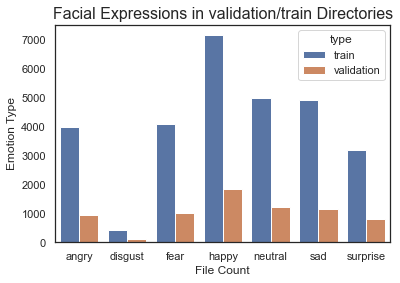

In [3]:
sns.set(style="white")
sns.barplot(x="emotion", y="count", hue="type", data=emotion_count_df)
plt.title("Facial Expressions in validation/train Directories", fontsize=16)
plt.xlabel("File Count")
plt.ylabel("Emotion Type")
plt.show()

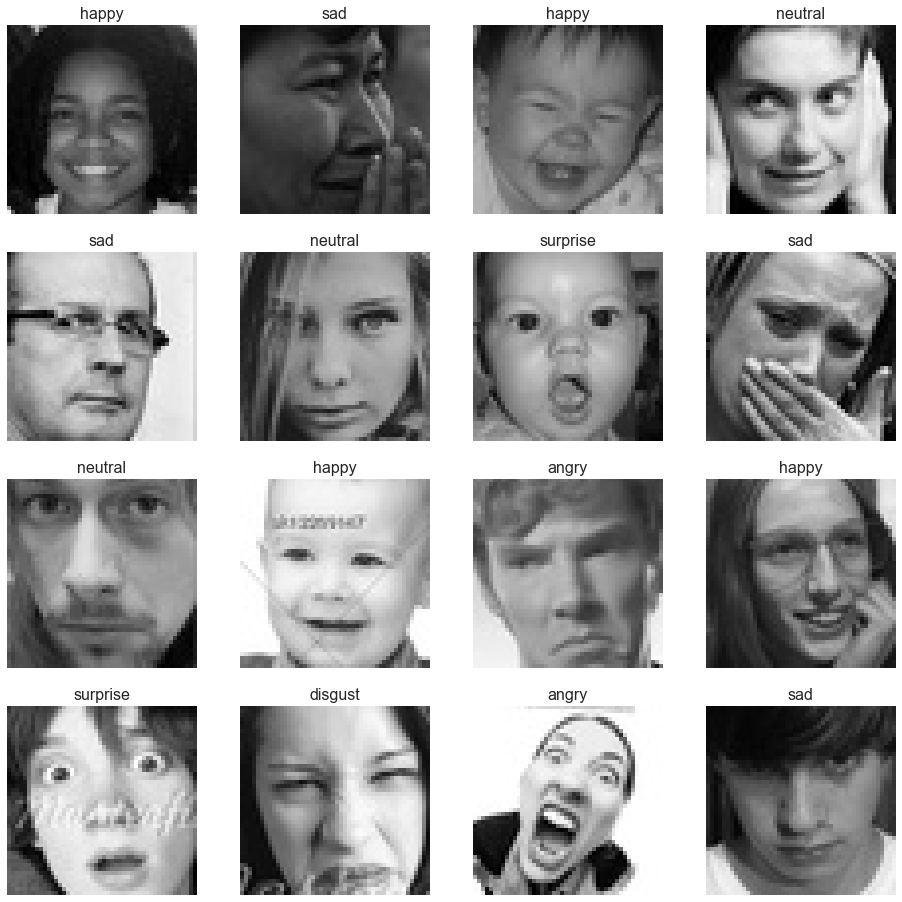

In [4]:
import random
get_random_child_file_path = lambda parent_path: os.path.join(parent_path, random.choice(os.listdir(parent_path)))

f, axarr = plt.subplots(4, 4, figsize=(16, 16))
r, c = 0, 0

for i in range(16):
    if (i % 4 == 0 and i != 0):
        r += 1
        c = 0
    emotion = get_random_child_file_path("dataset\\train\\")
    img = cv2.imread(get_random_child_file_path(emotion))
    axarr[r, c].imshow(img)
    axarr[r, c].set_title(os.path.basename(emotion), fontsize=16)
    axarr[r, c].axis('off')
    c += 1
plt.show()